# **A/B TESTING USING THE PERMUTATION TEST**

Emmanuel Amador Maldonado

This notebook aims to give some clarification about how to determine if two groups are different. To do so, I'll use a real-life example, and the A/B Testing. 

The **A/B Testing** is used when we want to see if two groups are different because of some specific feature, or if this difference is just due to chance. Usually is applied when we want to see if a group A is different/better/worse than group B.

For example: 
- Testing two prices to determine which yields more net profit.
- Testing two web headlines to determine which produces more clicks.

In this case, **we'll determine if Product A is cheaper than Product B**. 

Product A is a chocolate cake made by company A and the Product B is another chocolate cake but this was made by company B.

To determine if the results obtained are conclusive, I'll use an **Hypothesis Test**, which helps to determine whether random chance could be responsible of the differences in price or not.

**Null hypothesis:** The hypothesis that chance is to blame.

**Alternative hypothesis:** The results could not be due to change.

Notice that my target variable is a categorical one, specifically a binary one, if Product A is cheaper than Product B, then I'll set a 1, otherwise will be 0. My hypothesis is the next one:

***The cost of Product A is lower than Product B***

I need my **confidence interval to be 5% = 0.05**, as I don't care about if Product B is cheaper than Product A, my study is a **one-way test**, that is, it has a direction. If that would not be the case, and I would like to know if the cost of Product A is different from the cost of Product B, I'll be interested in knowing if is cheaper or more expensive, which that study will be a **two-way test**

I'll use **Python** to create this study 

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

Prices can be higher or lower based on where it is compared, but all the prices falls in some range, so this distribution of costs can be modeled as a normal distribution. I'll use two different normal distribution for each Product.

In [105]:
meanPrice1 = 80
meanPrice2 = 100
std = 5
std2 = 7
np.random.seed(seed=1) #just to allow replicate the results

ACost = np.random.normal(loc = meanPrice1, scale = std, size = 60).round(2) #we'll get 60 prices from the product A
BCost = np.random.normal(loc = meanPrice2, scale = std2, size = 40).round(2) # and 40 prices from the product B

realMeanCost = (BCost.mean()-ACost.mean()).round(2)

totalCosts = np.concatenate((ACost, BCost))  #to concatenate two or more numpy arrays you have to use tuples 

In [106]:
print(f"The mean value of the cost of Product A is {ACost.mean().round(2)} USD, whereas the mean cost of Product B is {BCost.mean().round(2)} USD\n"+
      f"meanBCosts - meanACosts = {realMeanCost} USD")

The mean value of the cost of Product A is 80.04 USD, whereas the mean cost of Product B is 100.97 USD
meanBCosts - meanACosts = 20.93 USD


The question to answer is: **Is this difference in the mean Product A and Product B prices different enough to say that Product A is cheaper than Product B?**

The costs distribution from Product A and Product B are shown in figure 1

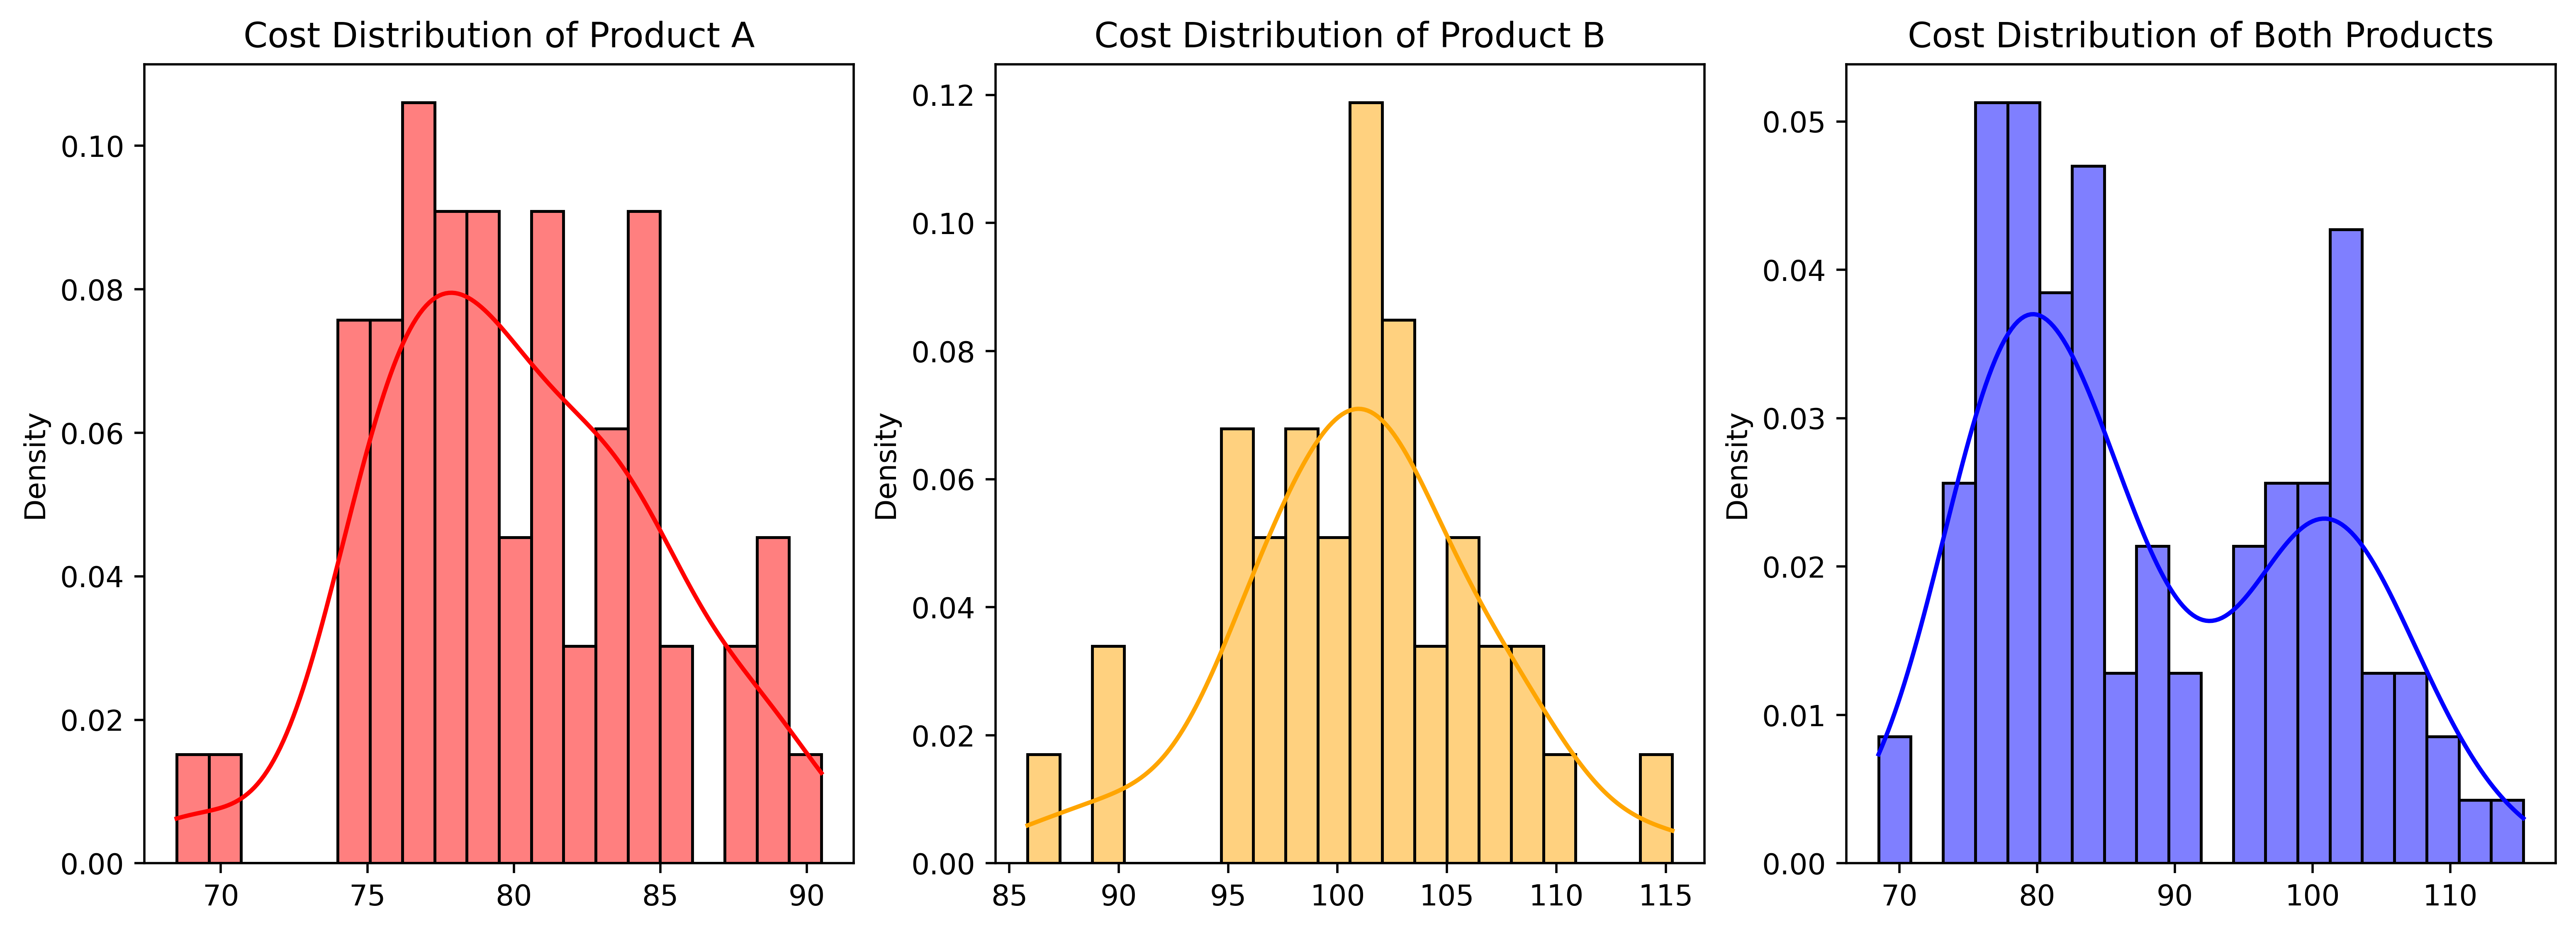

In [107]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.histplot(x=ACost, ax = ax[0], color = "red", bins = 20, kde = True, stat = "density")
sns.histplot(x=BCost, ax = ax[1], color = "orange", bins = 20, kde = True, stat = "density")
sns.histplot(x=totalCosts, ax = ax[2], color = "blue", bins = 20, kde = True, stat = "density") #kde is to show the distribution and stat is to adjust the values so the area is 1
ax[0].set_title("Cost Distribution of Product A")
ax[1].set_title("Cost Distribution of Product B")
ax[2].set_title("Cost Distribution of Both Products")
plt.show()

Im using the **Permutation Test**, which is the procedure of combining the two groups (in this case, combining the Product A and Product B costs in just one column, assuming that all the prices comes from the same cost distribution - There is no difference in prices).

Due to the **Central Limit Theorem**, no matter which type of distribution a category/group has, the distribution of their means will always behave as a normal distribution 

To do so, I'll create two functions: 

**classificator**: This function generates 1 random experiment, where randomly assign values from the totalCosts array to the "new Product A Costs". When the lenght of this new Product A Costs is equal to the original length of CostsA, then the remaining values from totalCosts will be the "new Product B Costs". This whole reasignation of the data is considered a permutation experiment.



In [108]:
def classificator(fullData, CostsA):
    fullData = list(fullData) # full_data will be shortened as the new_cost_A is been built
    newCostsA = [] 

    #In this for, I'll assing without replacement costs to new_cost_A
    for i in range(len(CostsA)):
        dataSelector = np.random.randint(0, len(fullData)-1)
        newCostsA.append(fullData.pop(dataSelector))
    
    newCostsB = fullData #at this point, the remaining data will be the new costs of Product B

    return np.array(newCostsA), np.array(newCostsB)


In [109]:
def permutationTest(n_tests, fullData, CostsA, realMeanCost):
    meanCostsDiffs = np.array([])
    counter = 0
    
    for i in range(n_tests):
        newCostsA, newCostsB = classificator(fullData, CostsA)
        meanCostsDiffs = np.append(meanCostsDiffs, (newCostsB.mean() - newCostsA.mean()).round(2))
        if (newCostsB.mean() - newCostsA.mean()).round(2) >= realMeanCost: #because is a one-way test
            counter += 1
    
    p_value = counter/n_tests
    plt.rcParams["figure.dpi"]=500
    plt.figure(figsize = (10,5))
    fig = sns.histplot(x= meanCostsDiffs, kde=True, stat= "density")
    fig.set(title = "Distribution of the mean differences between \nProduct A and Product B randomly chosen", xlabel = "meanCostB - meanCostA")
    return p_value

The probability that the differences in the means between Product A and Product B costs is higher or equal to the real mean diff is 0.0


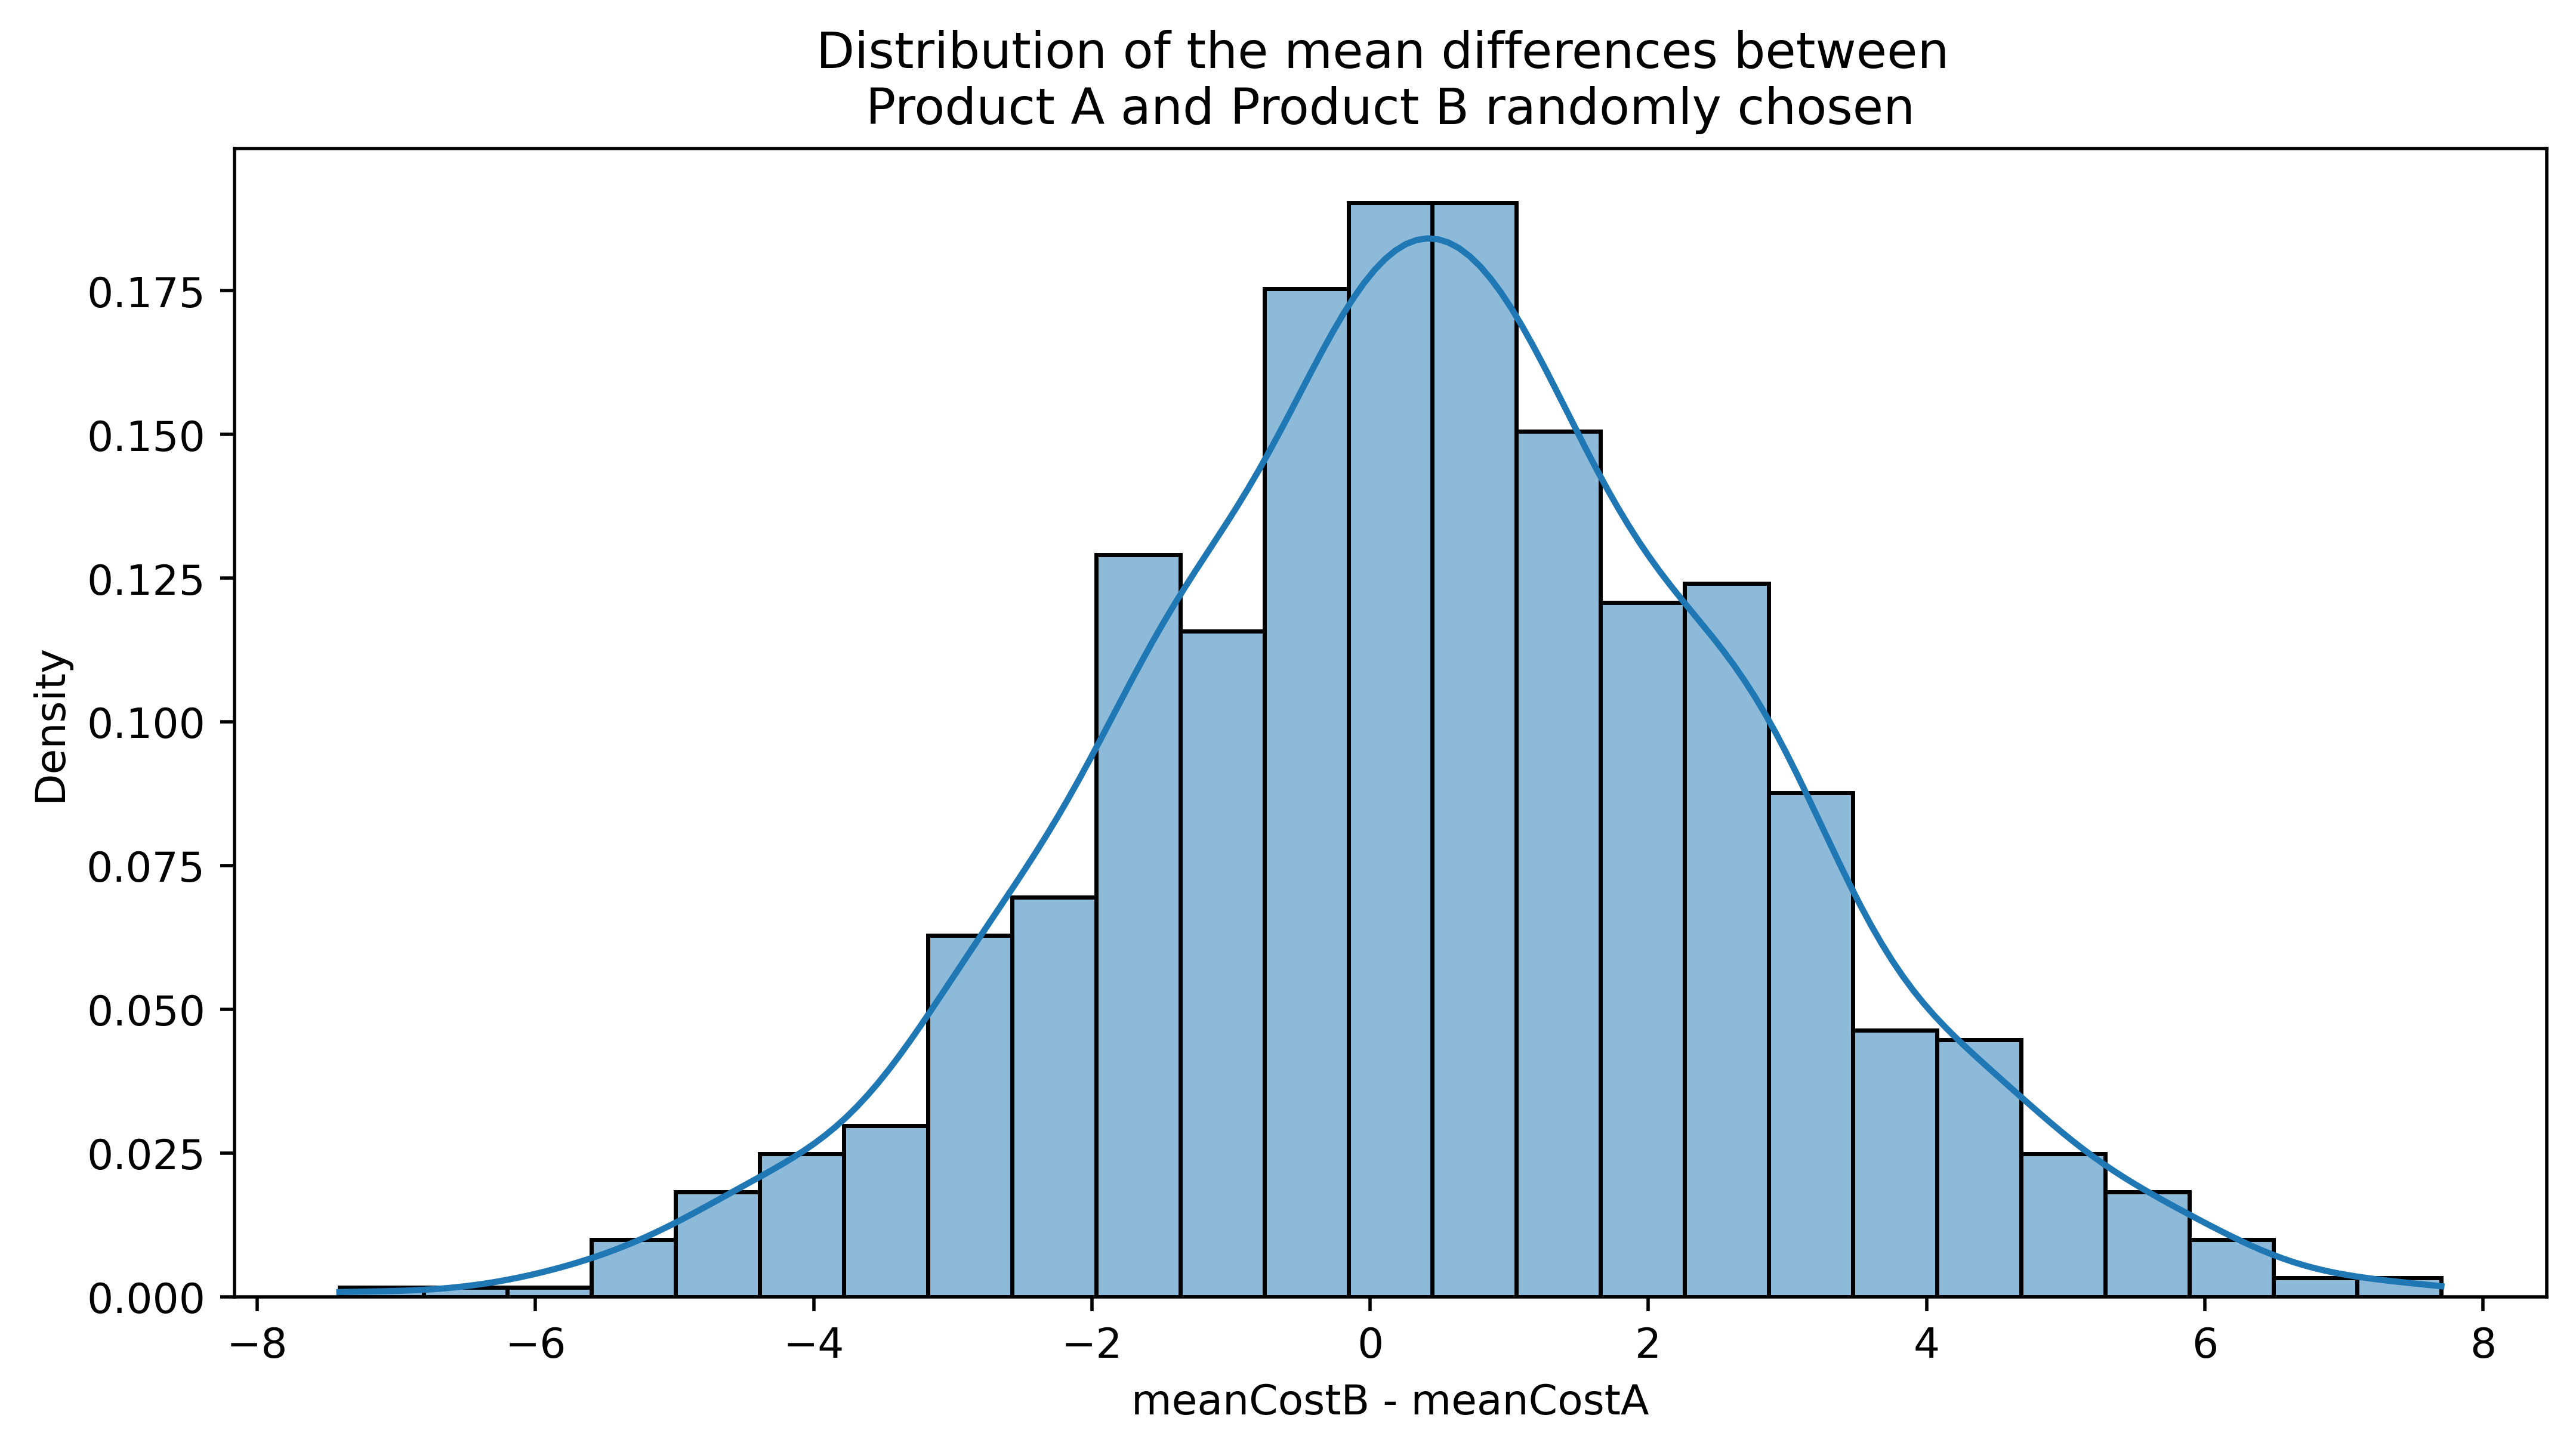

In [110]:
p_value = permutationTest(1000, totalCosts, ACost, realMeanCost)
print(f"The probability that the differences in the means between Product A and Product B costs is higher or equal to the real mean diff is {p_value}")

Considering that the threshold to accept there is a real difference in costs between Product A and Product B was of only 0.05, we can strongly reject the Null hypothesis
and say that:

**There is a real and significant difference between Product A and product B costs, showing that Product A is CHEAPER than Product B**

To make it clearer, we can see that the difference in costs between Product A and B, if both products has the same costs, should shown a "maximum" difference of 8 USD, and in the real life we found a diff of 20 USD aproximately. So is not due to random that the Product A is cheaper than Product B.

**What if the difference between prices in real life are more likely to each other?**

In [111]:
mean1 = 80
mean2 = 81
std = 10
std2 = 10
np.random.seed(seed=1)
ACost = np.random.normal(loc = mean1, scale = std, size = 60)
BCost = np.random.normal(loc = mean2, scale = std2, size = 65)

realMeanCost = (BCost.mean()-ACost.mean()).round(2)

totalCosts = np.concatenate((ACost, BCost))  #to concatenate two or more numpy arrays you have to use tuples 

print(f"The mean value of the cost of Product A is {ACost.mean().round(2)} USD, whereas the mean cost of Product B is {BCost.mean().round(2)} USD\n"+
      f"meanBCosts - meanACosts = {realMeanCost} USD")

The mean value of the cost of Product A is 80.08 USD, whereas the mean cost of Product B is 81.67 USD
meanBCosts - meanACosts = 1.59 USD


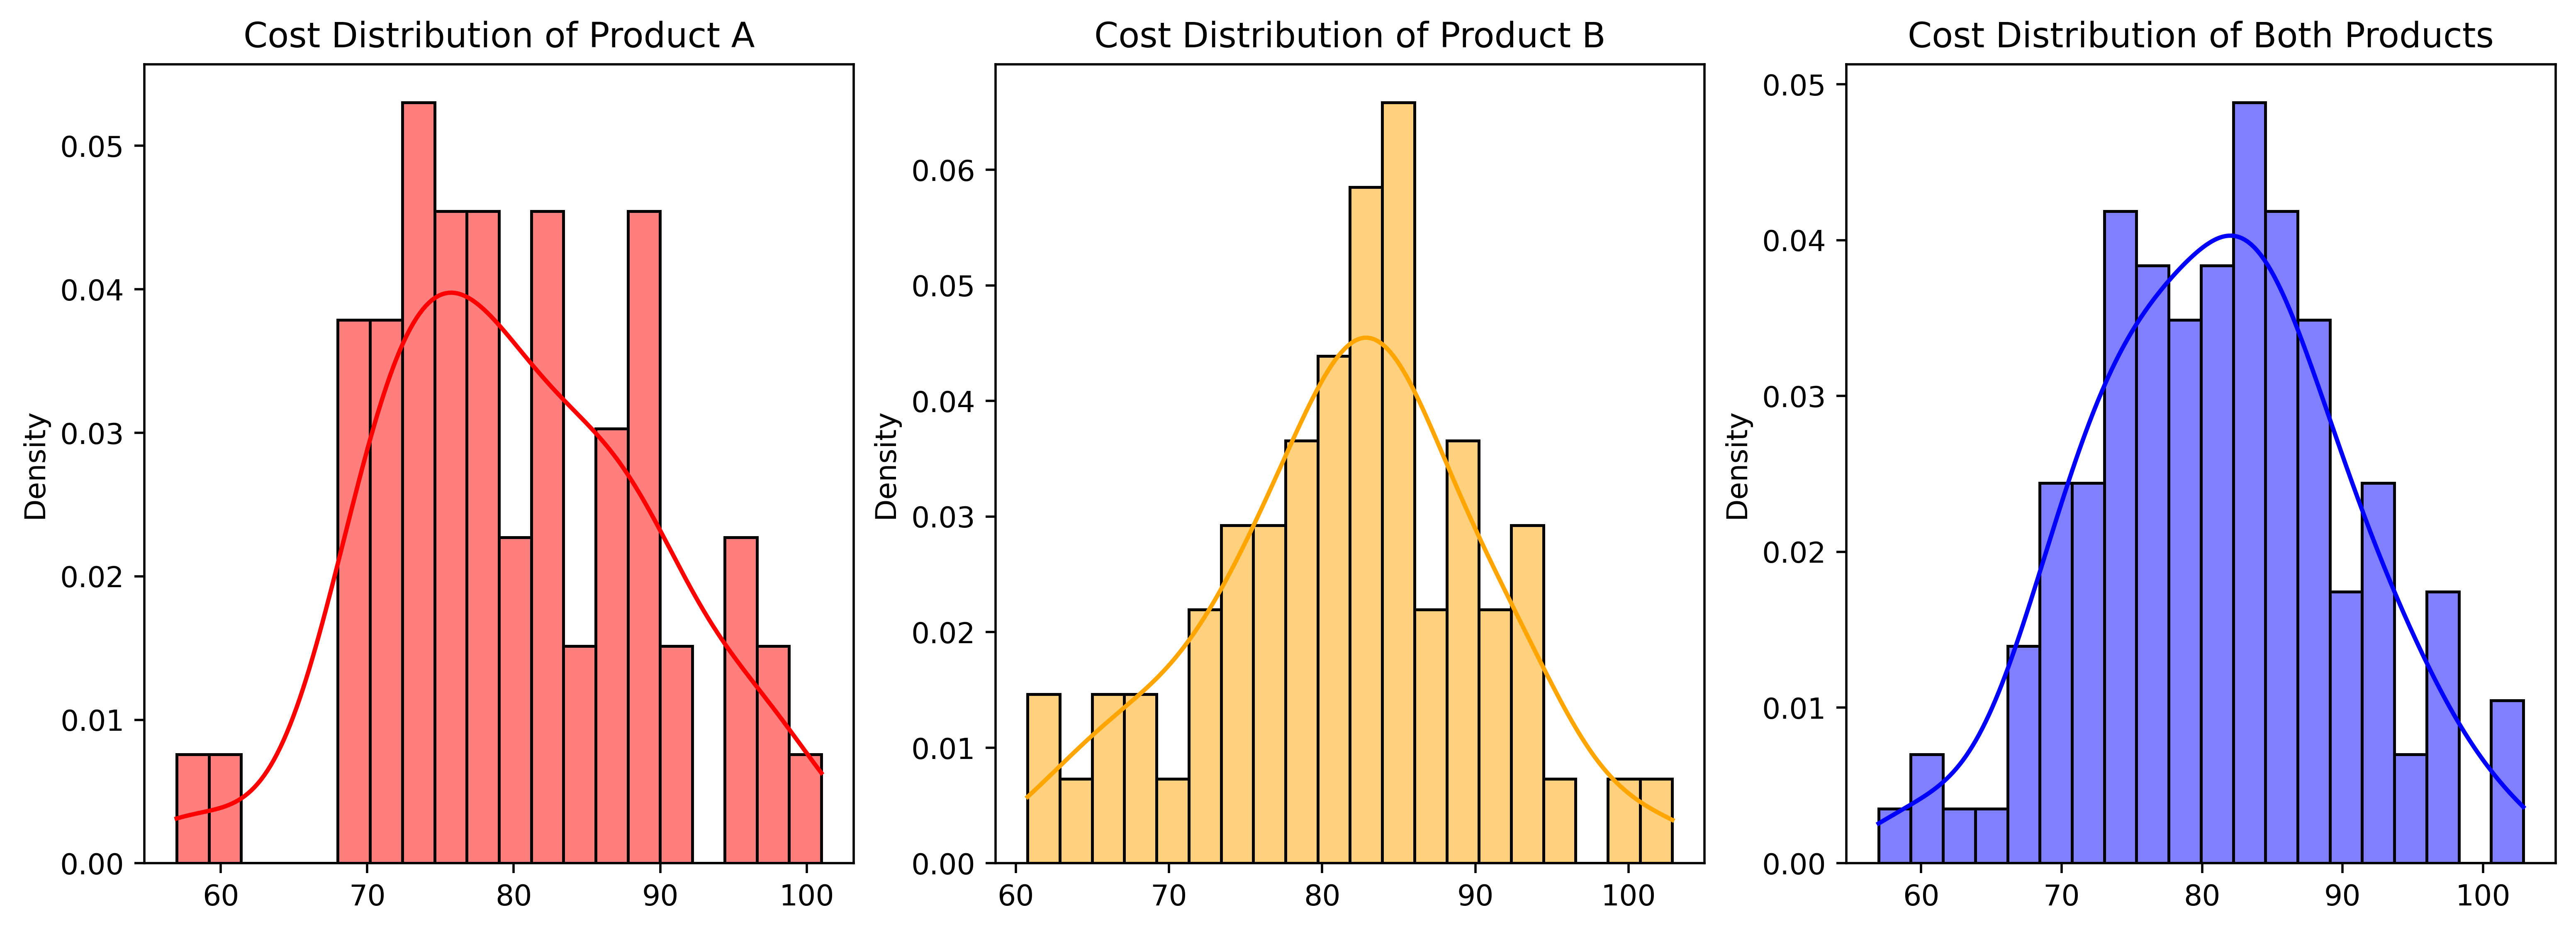

In [112]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.histplot(x=ACost, ax = ax[0], color = "red", bins = 20, kde = True, stat = "density")
sns.histplot(x=BCost, ax = ax[1], color = "orange", bins = 20, kde = True, stat = "density")
sns.histplot(x=totalCosts, ax = ax[2], color = "blue", bins = 20, kde = True, stat = "density") #kde is to show the distribution and stat is to adjust the values so the area is 1
ax[0].set_title("Cost Distribution of Product A")
ax[1].set_title("Cost Distribution of Product B")
ax[2].set_title("Cost Distribution of Both Products")
plt.show()

The probability that the differences in the means between Product A and Product B costs is higher or equal to the real mean diff is 0.121


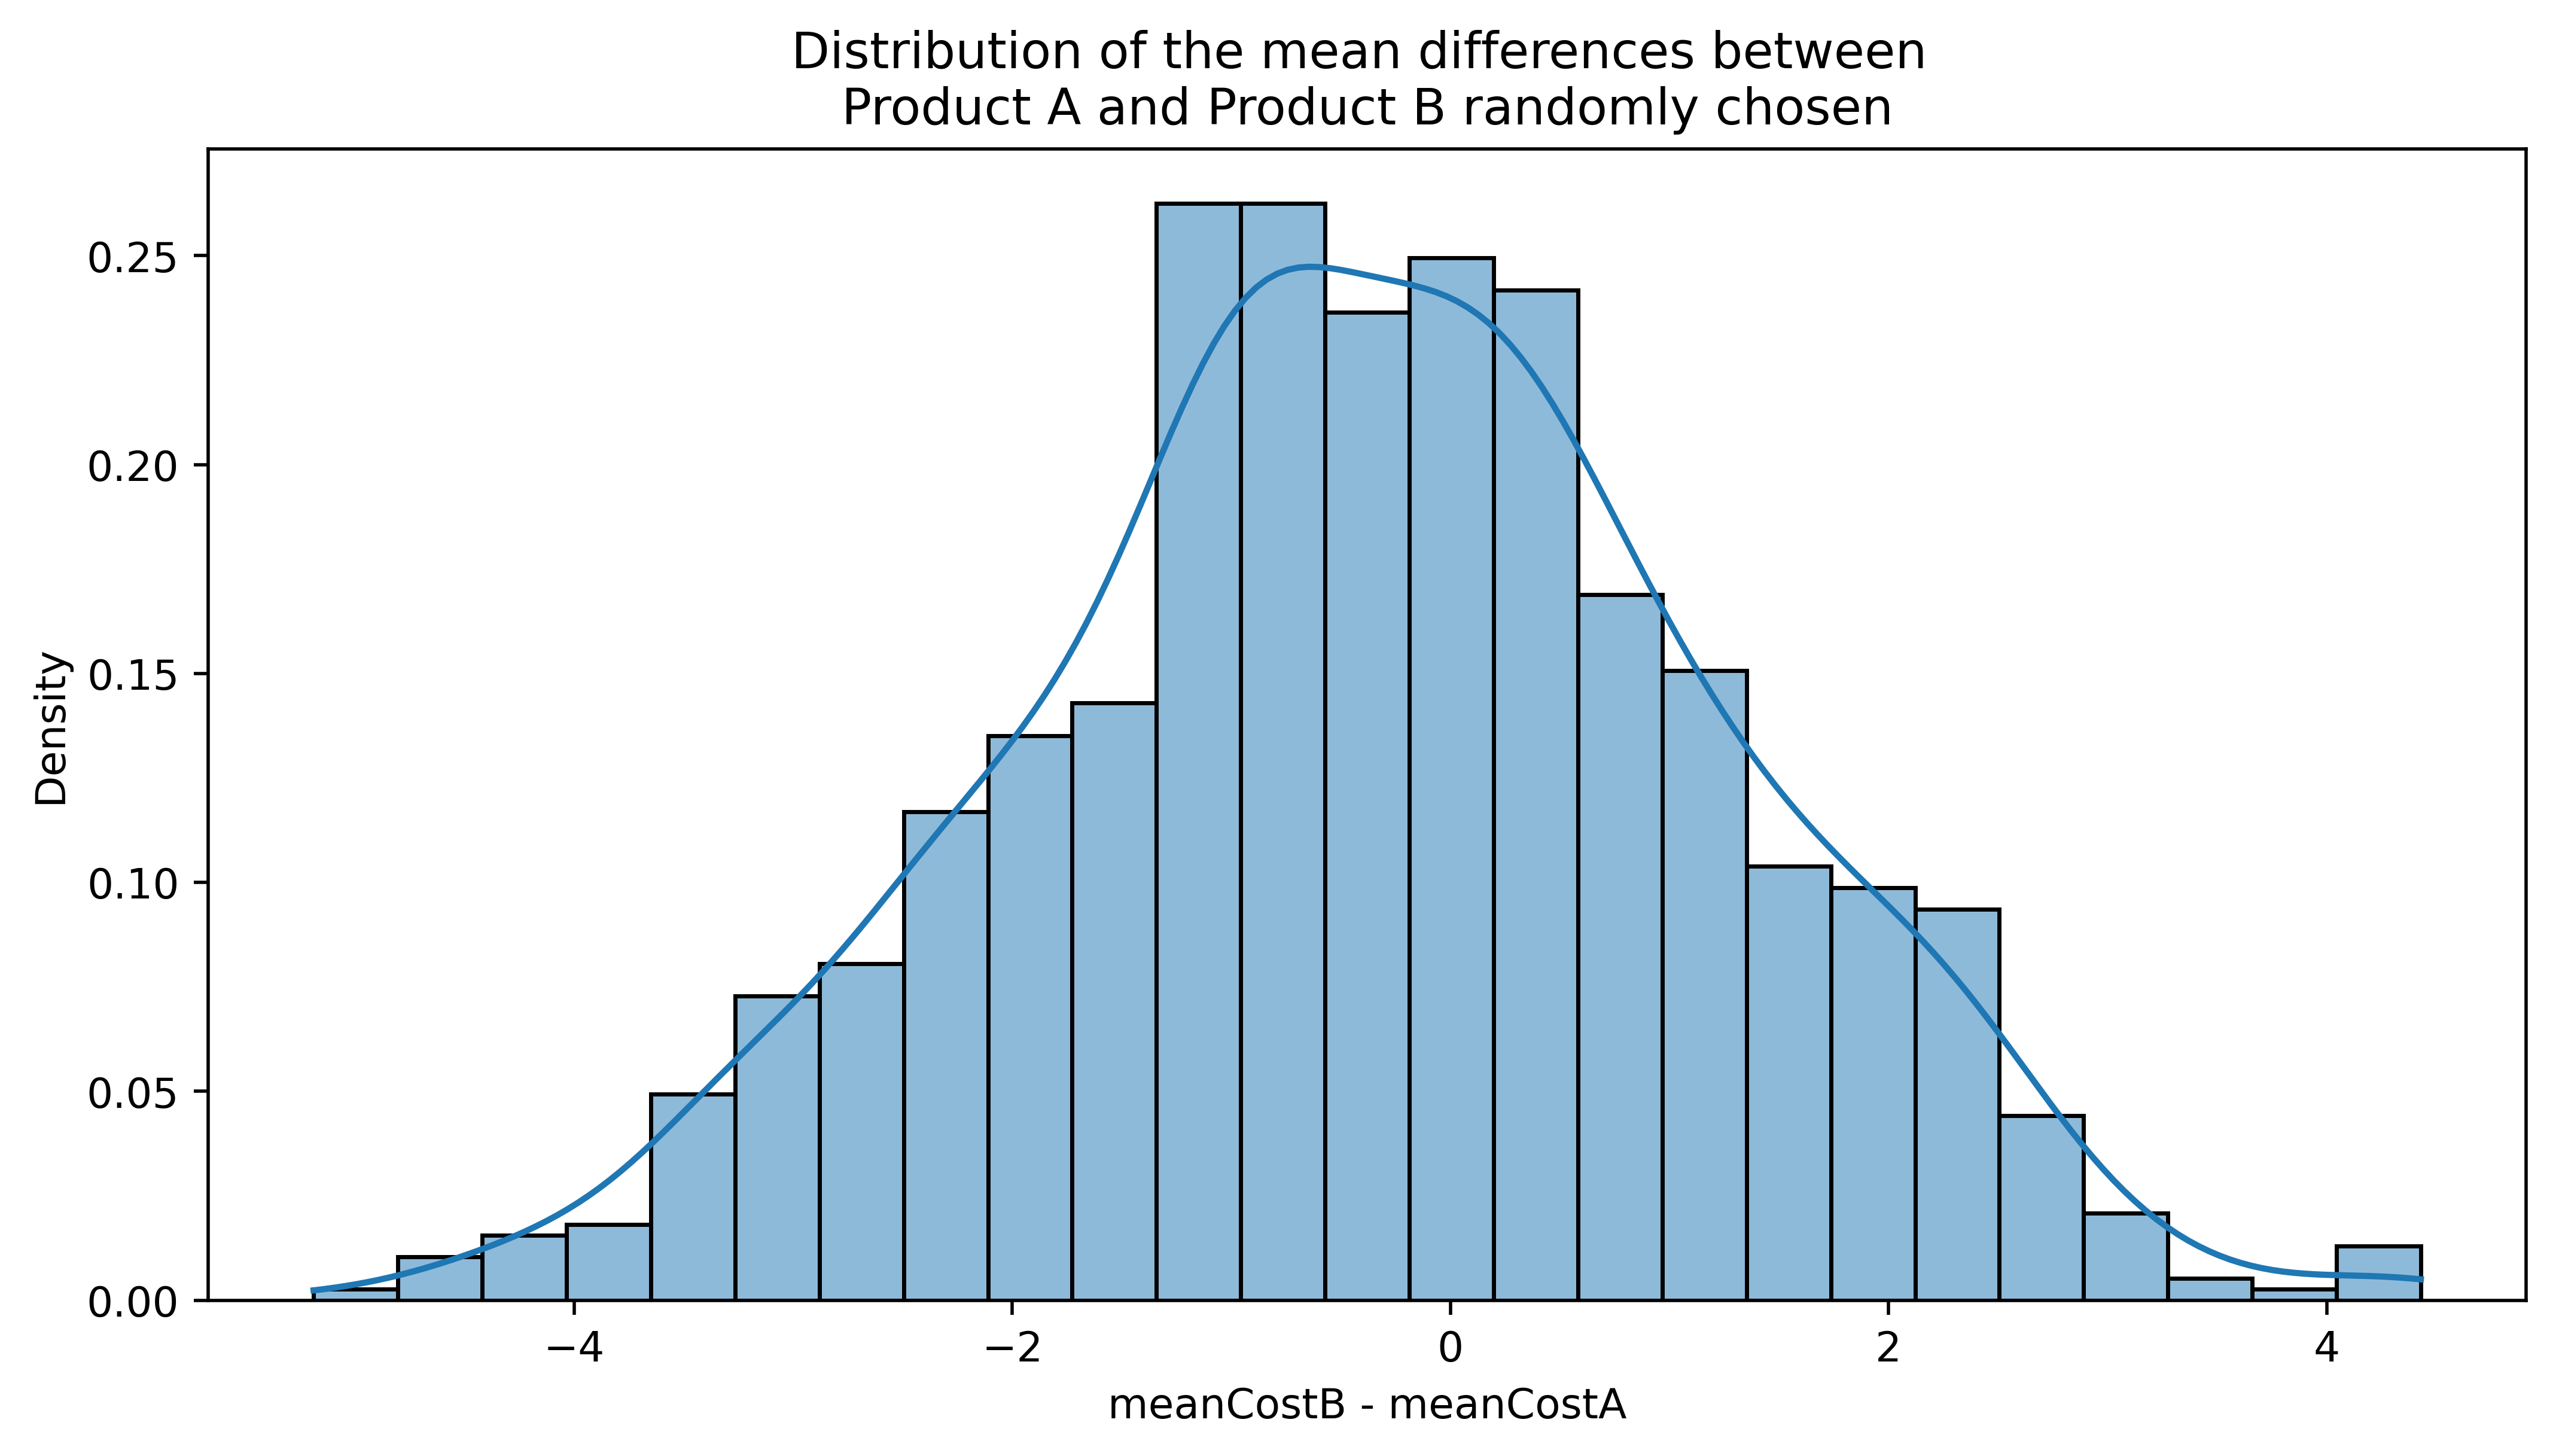

In [113]:
p_value = permutationTest(1000, totalCosts, ACost, realMeanCost)
print(f"The probability that the differences in the means between Product A and Product B costs is higher or equal to the real mean diff is {p_value}")

**In this case, both products are very similar in price, the distribution was really close to each other, and the probability that the real mean diff is due to change was higher than our threshold, which makes us confirm the NUll hypothesis, saying that there is no difference in price in Product A and Product B because this difference is due to chance**


The advantage of this type of approach is that no assumptions about normally-distributed data are needed